In [1]:
#Imorting the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from subprocess import check_output
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [3]:
df=pd.read_csv('USvideos.csv')

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.shape

(40949, 16)

In [6]:
df.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [7]:
#Check the null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


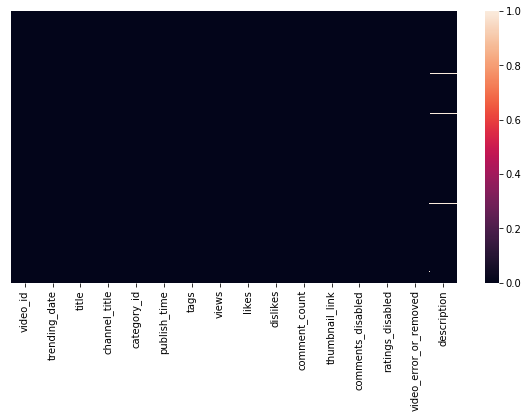

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar='virdius')
plt.show()

In [10]:
#See if if views,likes,dislikes and comment counts have normal distribution 

In [11]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


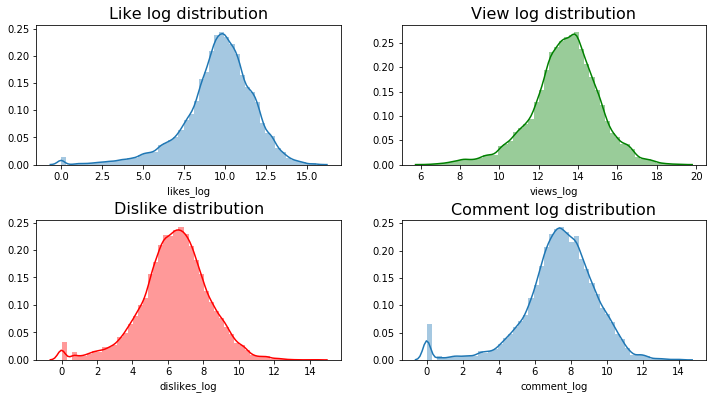

In [12]:
df['likes_log']=np.log(df['likes'] + 1)
df['views_log']=np.log(df['views'] + 1)
df['dislikes_log']=np.log(df['dislikes']+1)
df['comment_log']=np.log(df['comment_count']+1)

plt.figure(figsize=(12,6))

plt.subplot(221)
g1=sns.distplot(df['likes_log'])
g1.set_title('Like log distribution',fontsize=16)

plt.subplot(222)
g2=sns.distplot(df['views_log'],color='green')
g2.set_title('View log distribution',fontsize=16)

plt.subplot(223)
g3=sns.distplot(df['dislikes_log'],color='red')
g3.set_title('Dislike distribution',fontsize=16)

plt.subplot(224)
g4=sns.distplot(df['comment_log'])
g4.set_title("Comment log distribution",fontsize=16)

plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)
plt.show()

In [13]:
#Qunatile of all the four logs

In [14]:
print('View quantiles')
print(df['views'].quantile([.01,.25,.5,.75,.99]))
print('Like quantiles')
print(df['likes'].quantile([.01,.25,.5,.75,.99]))
print('Dislike quantiles')
print(df['dislikes'].quantile([.01,.25,.5,.75,.99]))
print('Comment quantiles')
print(df['comment_count'].quantile([.01,.25,.5,.75,.99]))

View quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64
Like quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64
Dislike quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64
Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [15]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_log'],
      dtype='object')

In [16]:
df['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

In [17]:
#Assign the name to each category

In [18]:
df['category_name']=np.nan
df.loc[(df['category_id']==1),'category_name']='Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

In [19]:
#Analyise the count at category name

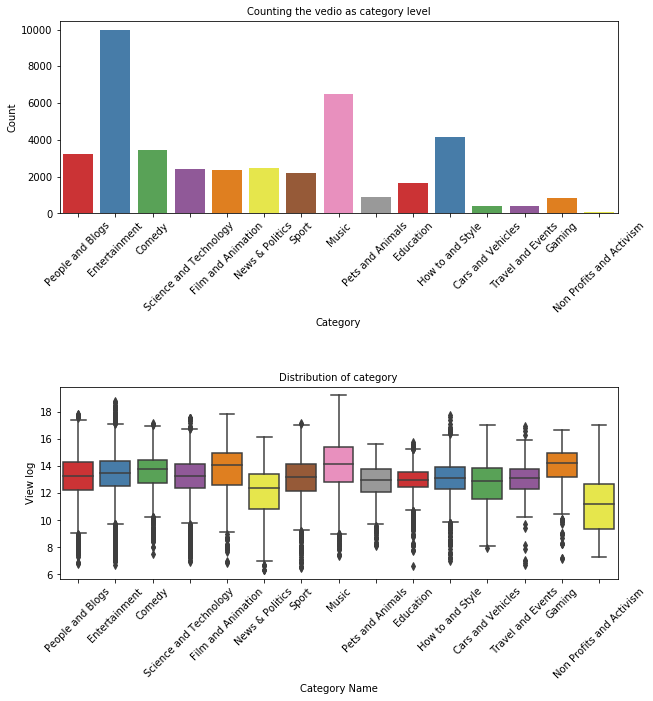

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(211)
g=sns.countplot(x='category_name',data=df,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the vedio as category level",fontsize=10)
g.set_xlabel("Category",fontsize=10)
g.set_ylabel("Count",fontsize=10)

plt.subplot(212)
g=sns.boxplot(x='category_name',y='views_log',data=df,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title('Distribution of category',fontsize=10)
g.set_xlabel('Category Name',fontsize=10)
g.set_ylabel('View log',fontsize=10)

plt.subplots_adjust(hspace=0.9,top=0.9)

plt.show()

In [21]:
#Get the percent of like, dislike and comment in each category

In [22]:
df['like_rate']=df['likes']/df['views'] * 100
df['dislike_rate']=df['dislikes']/df['views'] *100
df['comment_rate']=df['comment_count']/df['views']*100

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


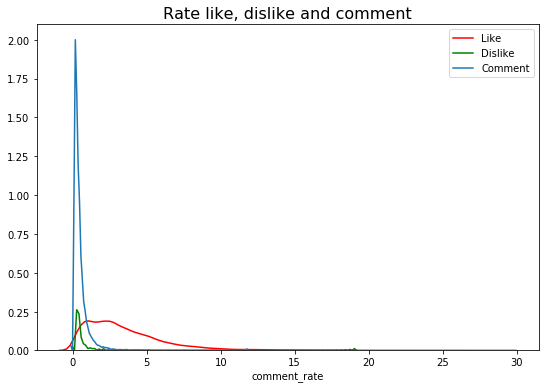

In [23]:
plt.figure(figsize=(9,6))

g1=sns.distplot(df['like_rate'],color='red',hist=False,label='Like')
g2=sns.distplot(df['dislike_rate'],color='green',hist=False,label='Dislike')
g3=sns.distplot(df['comment_rate'],hist=False,label='Comment')
g1.set_title('Rate like, dislike and comment',fontsize=16)
plt.legend()
plt.show()

In [24]:
#Analysis other categorical variables

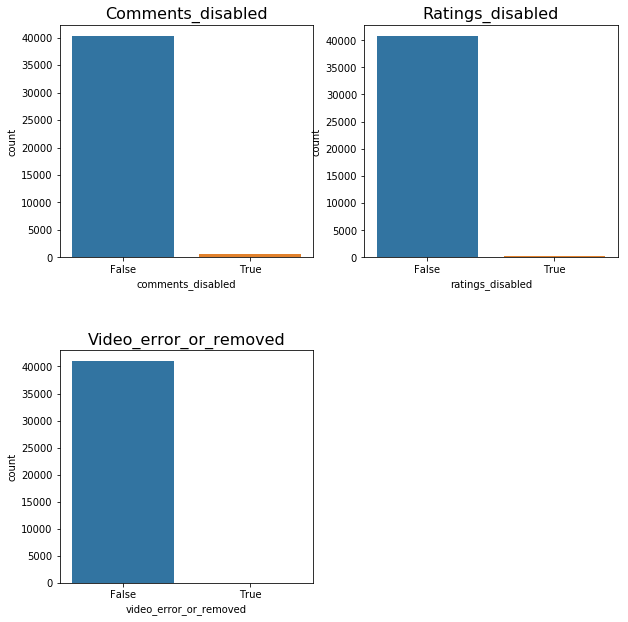

In [26]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)

plt.subplot(2,2,1)
g1=sns.countplot(x='comments_disabled',data=df)
g1.set_title('Comments_disabled',fontsize=16)

plt.subplot(2,2,2)
g2=sns.countplot(x='ratings_disabled',data=df)
g2.set_title('Ratings_disabled',fontsize=16)

plt.subplot(2,2,3)
g3=sns.countplot(x='video_error_or_removed',data=df)
g3.set_title('Video_error_or_removed',fontsize=16)

plt.show()


In [27]:
#Find the correlation between numerical variable

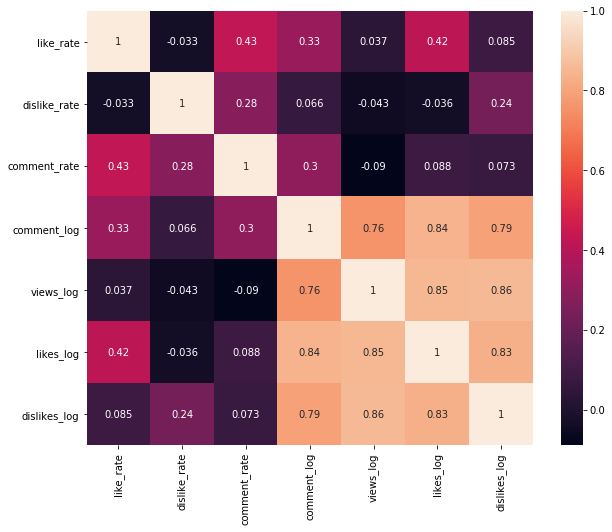

In [28]:
plt.figure(figsize=(10,8))

sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(),annot=True)
plt.show()

In [29]:
#Text analysis

In [30]:
import string
import re
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [31]:
eng_stopwords=set(stopwords.words("english"))

In [34]:
#Word count in each comment
df['count_word']=df['title'].apply(lambda x:len(str(x).split()))
df['count_word_tags']=df['tags'].apply(lambda x:len(str(x).split()))

#Unique work count
df['count_unique_word']=df['title'].apply(lambda x:len(set(str(x).split())))
df['count_unique_word_tags']=df['tags'].apply(lambda x:len(set(str(x).split())))

#Letter count
df['count_letters']=df['title'].apply(lambda x:len(str(x)))
df['count_letter_tags']=df['tags'].apply(lambda x:len(str(x)))

#Punctuation count
df['count_punctuation']=df['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df['count_puncation_tag']=df['tags'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#Upper case words count
df['count_words_upper']=df['title'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df['count_words_upper_tag']=df['tags'].apply(lambda x:len([w for w in str(x).split() if w.isupper()]))

#Title case count
df['count_words_title']=df['title'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df['count_words_title_tag']=df['tags'].apply(lambda x:len([w for w in str(x).split() if w.istitle]))

#Number of stop of words
df['count_stopwords']=df['title'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df['count_stopwords_tags']=df['tags'].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    
#average length of words
df['mean_of_len']=df['title'].apply(lambda x: np.mean([len(x) for w in str(x).split()]))
df['mean_of_len_tag']=df['tags'].apply(lambda x:np.mean([len(x) for w in str(x).split()]))

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


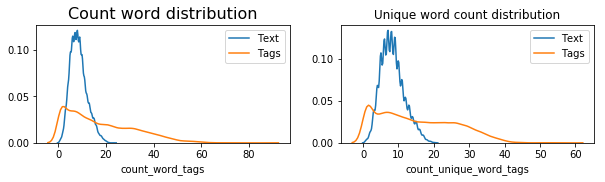

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(421)
g1=sns.distplot(df['count_word'],hist=False,label='Text')
g1=sns.distplot(df['count_word_tags'],hist=False,label='Tags')
g1.set_title('Count word distribution',fontsize=16)

plt.subplot(422)
g2=sns.distplot(df['count_unique_word'],hist=False,label='Text')
g2=sns.distplot(df['count_unique_word_tags'],hist=False,label='Tags')
g2.set_title('Unique word count distribution')
plt.show()

In [38]:
#Word cloud

In [39]:
plt.rcParams['font.size']=15
plt.rcParams['savefig.dpi']=100
plt.rcParams['figure.subplot.bottom']=.1

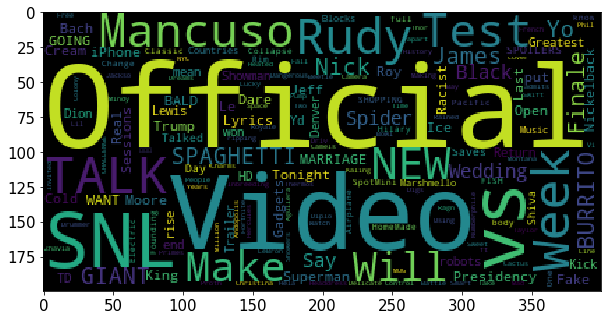

In [46]:
plt.figure(figsize=(10,10))

stopwords=set(STOPWORDS)

wordcloud=WordCloud(
                    background_color='black',
                    stopwords=stopwords,
                    max_words=1000,
                    max_font_size=120,
                    random_state=101).generate(str(df['title']))
plt.imshow(wordcloud)
plt.show()

In [47]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_log', 'category_name', 'like_rate',
       'dislike_rate', 'comment_rate', 'count_word', 'count_word_tags',
       'count_unique_word', 'count_unique_word_tags', 'count_letters',
       'count_letter_tags', 'count_punctuation', 'count_puncation_tag',
       'count_words_upper', 'count_words_upper_tag', 'count_words_title',
       'count_words_title_tag', 'count_stopwords', 'count_stopwords_tags',
       'mean_of_len', 'mean_of_len_tag'],
      dtype='object')

In [49]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [52]:
df['month'] = df['publish_time'].dt.month

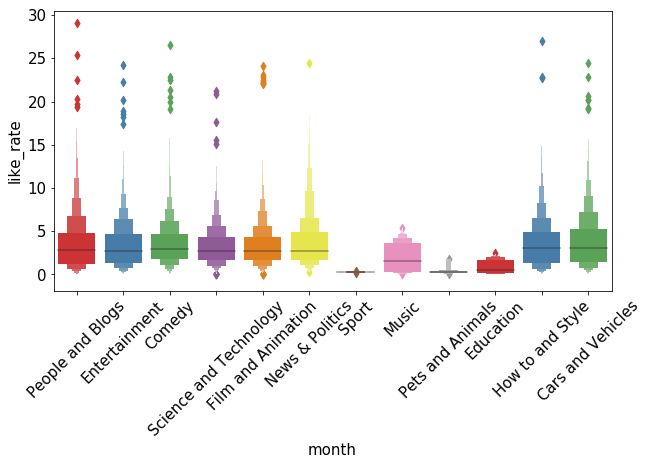

In [57]:
plt.figure(figsize=(10,5))
g1=sns.boxenplot(x='month',y='like_rate',data=df,palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()